In [2]:
from google.colab import drive
from google.colab import files

drive.mount('/content/drive')

Mounted at /content/drive


# Create New History File

In [3]:
history = {
    'loss': [
        8.0534, 5.2201, 4.1658, 3.3915, 2.7605,
        2.3040, 2.0064, 1.8100, 1.6882, 1.6026,
        1.5049, 1.3341, 1.1789, 1.0307, 0.8842
    ],
    'val_loss': [
        5.5830, 4.3735, 3.6612, 3.0444, 2.7038,
        2.5061, 2.3790, 2.3529, 2.3275, 2.3094,
        2.2668, 2.2565, 2.2883, 2.3520, 2.3658
    ],
    'masked_accuracy': [
        0.0717, 0.2474, 0.3590, 0.4488, 0.5220,
        0.5752, 0.6100, 0.6341, 0.6492, 0.6600,
        0.6741, 0.7012, 0.7270, 0.7536, 0.7810
    ],
    'val_masked_accuracy': [
        0.2217, 0.3380, 0.4195, 0.4925, 0.5338,
        0.5516, 0.5714, 0.5720, 0.5712, 0.5839,
        0.5902, 0.5921, 0.5929, 0.5913, 0.5980
    ]
}



In [4]:
import pickle
import os

customFilename = '' # Change according to the model name

destination_folder = '/content/drive/MyDrive/historyFiles'
os.makedirs(destination_folder, exist_ok=True)

file_path = os.path.join(destination_folder, customFilename)

with open(file_path, 'wb') as file:
    pickle.dump(history, file)

print(f'File saved successfully at {file_path}')


File saved successfully at /content/drive/MyDrive/historyFiles/history.pkl


# Generate Graphs for Each Model



1.   Make sure all history files are saved in drive '/content/drive/MyDrive/historyFiles'
2.   Add file names and labels according to the format for all new models added.



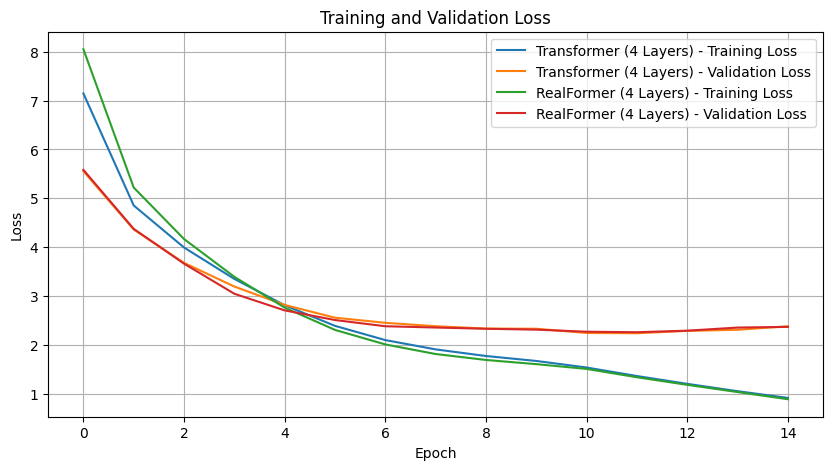

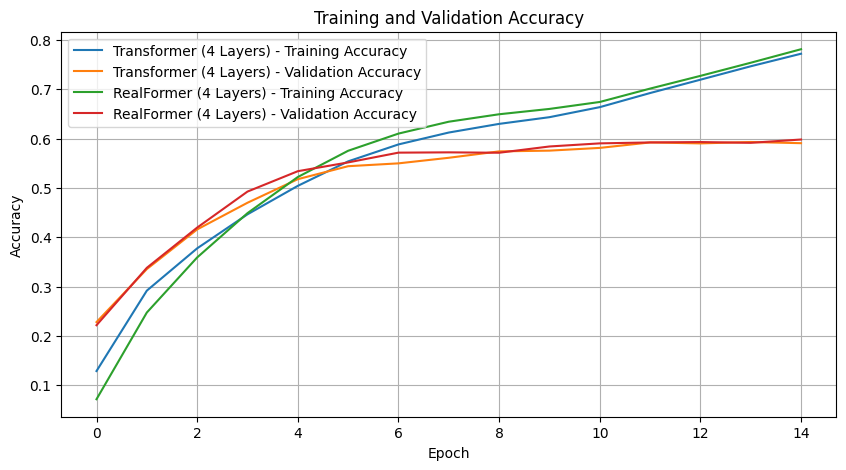

In [7]:
import matplotlib.pyplot as plt
import pickle
import os

file_names = ['transformerHistory_4layers.pkl', 'realformerHistory_4layers.pkl']
labels = ['Transformer (4 Layers)', 'RealFormer (4 Layers)']


plt.figure(figsize=(10, 5))
for file_name, label in zip(file_names, labels):
    history_path = os.path.join('/content/drive/MyDrive/historyFiles', file_name)

    with open(history_path, 'rb') as file:
        history = pickle.load(file)


    plt.plot(history['loss'], label=f'{label} - Training Loss')
    plt.plot(history['val_loss'], label=f'{label} - Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
for file_name, label in zip(file_names, labels):
    history_path = os.path.join('/content/drive/MyDrive/historyFiles', file_name)

    with open(history_path, 'rb') as file:
        history = pickle.load(file)

    plt.plot(history['masked_accuracy'], label=f'{label} - Training Accuracy')
    plt.plot(history['val_masked_accuracy'], label=f'{label} - Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
